In [2]:
import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load

In [14]:
#データの読み込み
X = pd.read_pickle(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\データ\X.pkl")
y = pd.read_pickle(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\データ\y.pkl")
X_train = pd.read_pickle(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\データ\X_train.pkl")
y_train = pd.read_pickle(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\データ\y_train.pkl")
X_test = pd.read_pickle(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\データ\X_test.pkl")
y_test = pd.read_pickle(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\データ\y_test.pkl")

In [ ]:
# モデルの読み込み
model = load(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\model.joblib")

In [ ]:
# 結果の読み込み
metrics = pd.read_csv(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\metrics.csv")
preds = pd.read_csv(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\predictions.csv")

In [28]:
# SHAPの読み込み
explainer = shap.TreeExplainer(model=model)
shap_values = np.load(r"C:\WorkSpace\Jerespire\結果保存\20251031_143324\shap_values.npy")
# explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test.values, feature_names=X_test.columns.tolist()) 
explanation = explainer(X) 

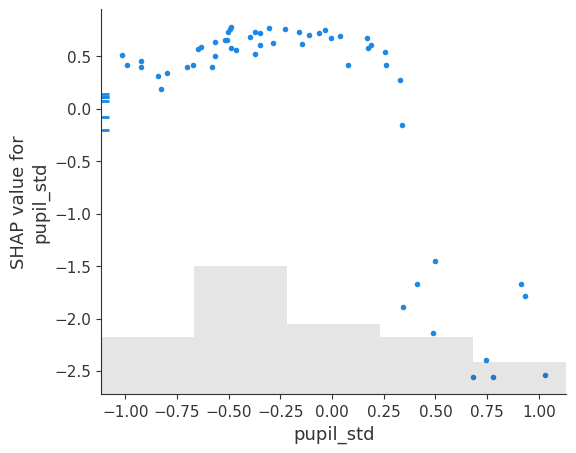

In [34]:
shap.plots.scatter(explanation[:,11])

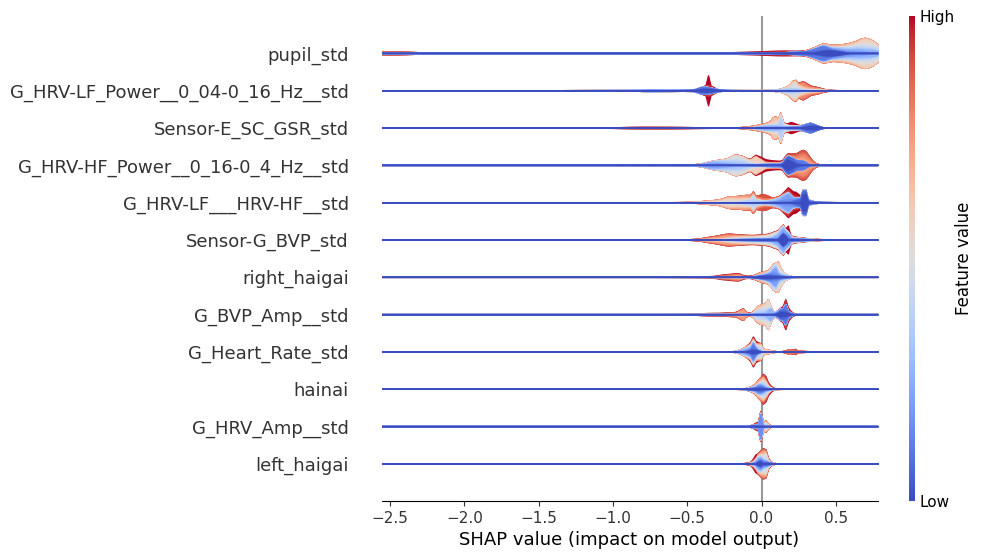

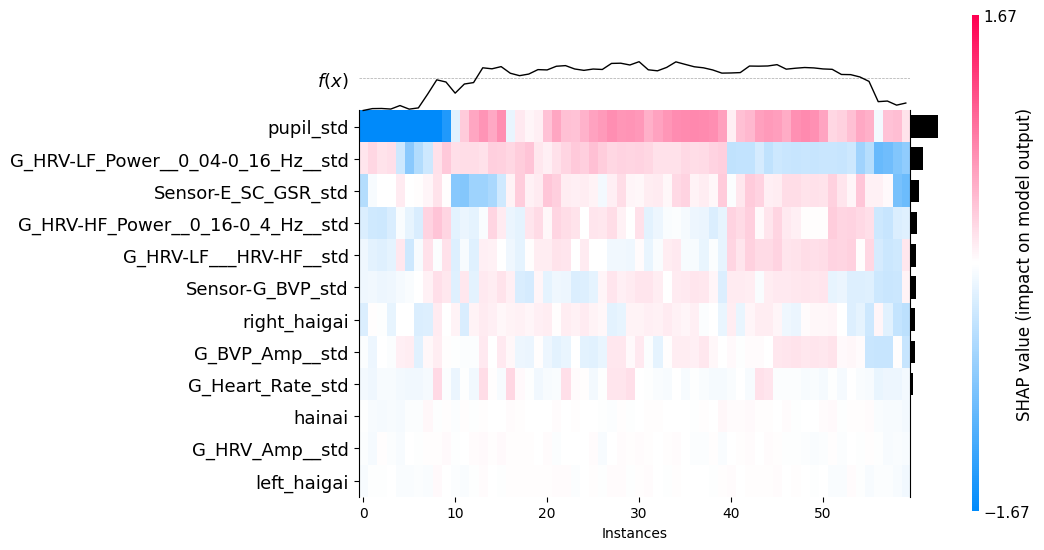

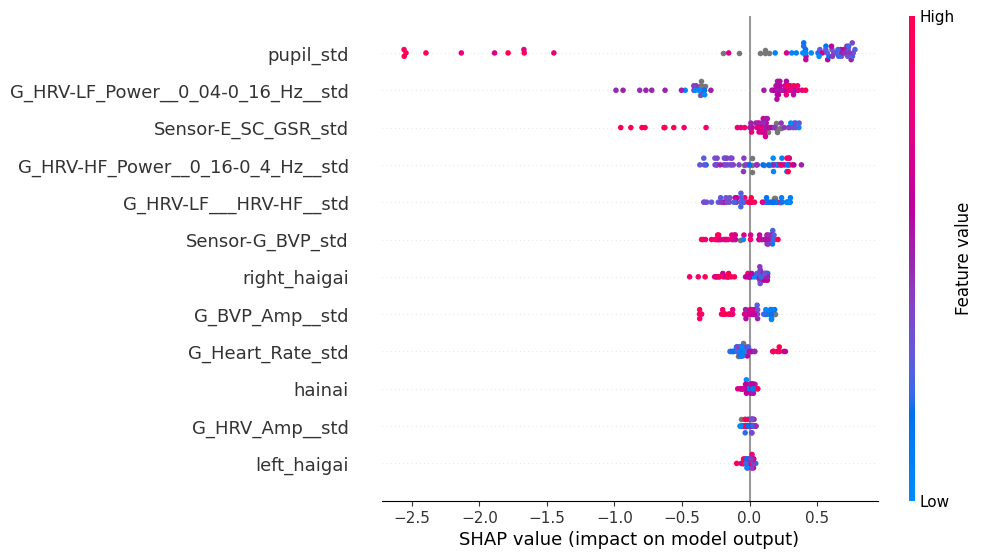

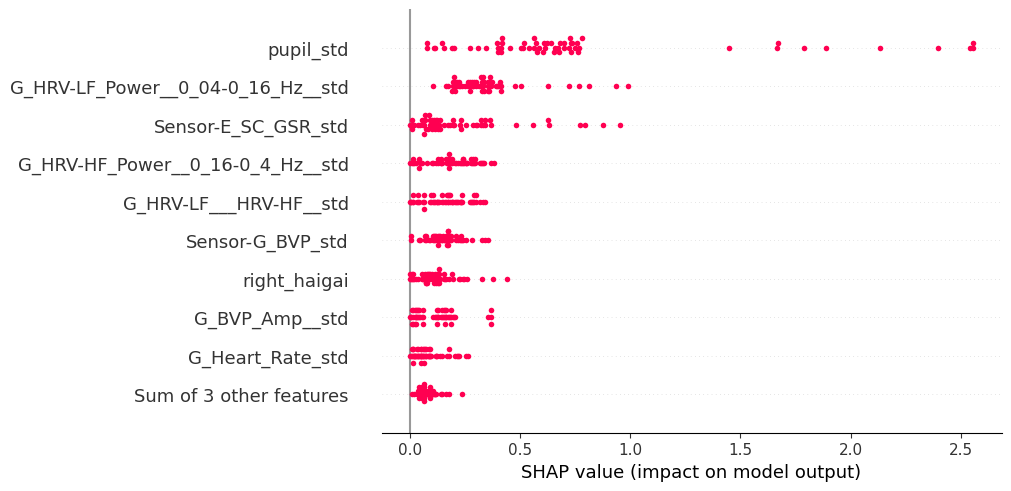

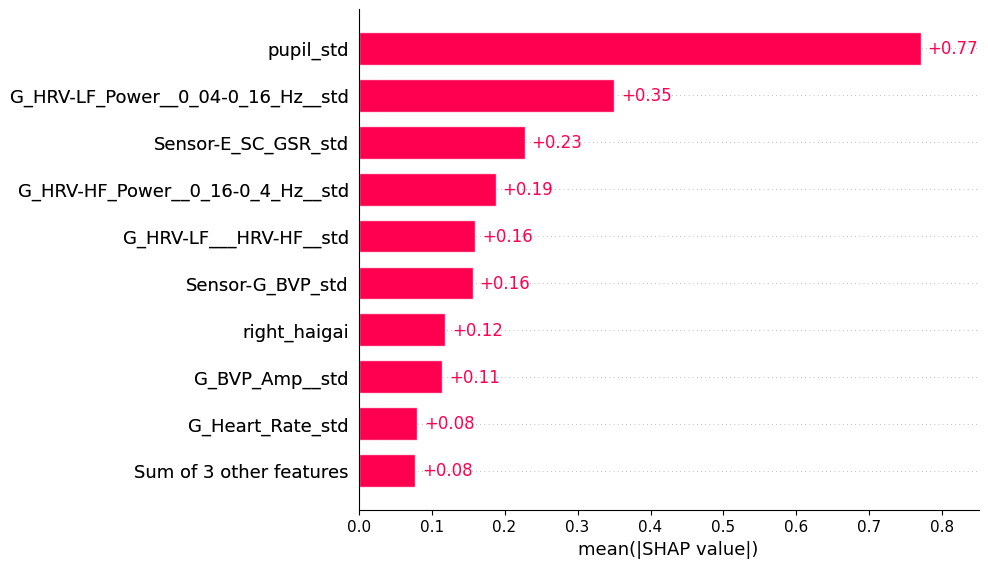

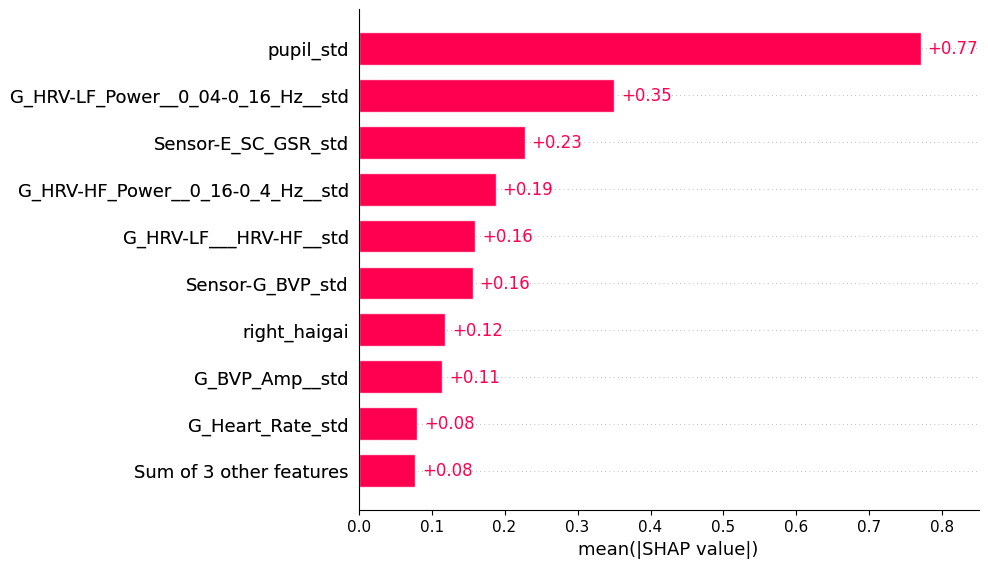

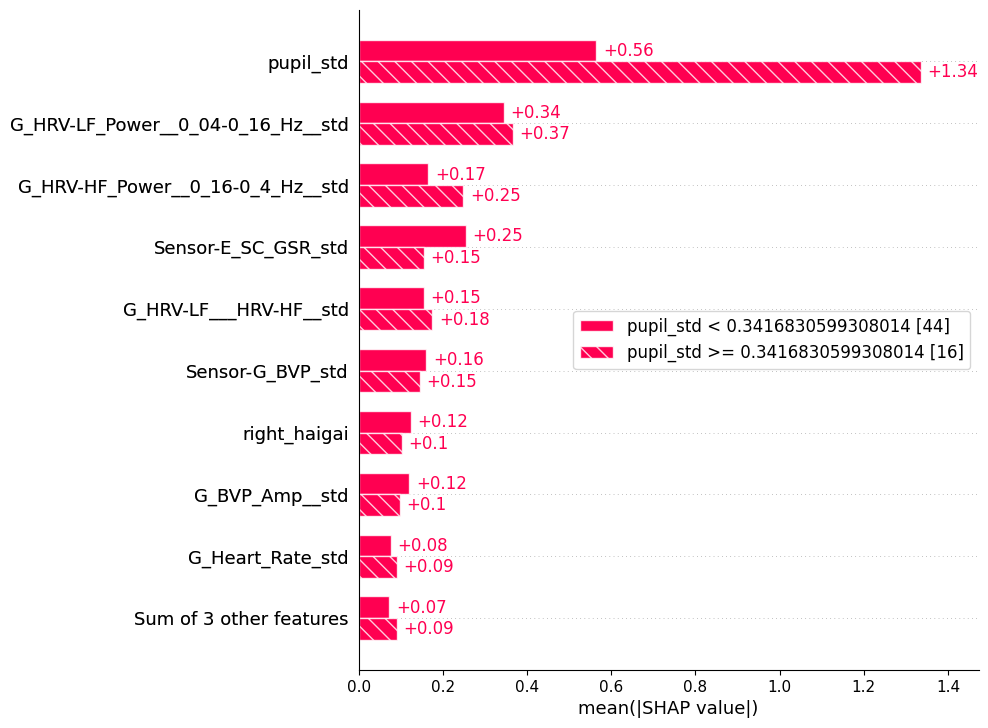

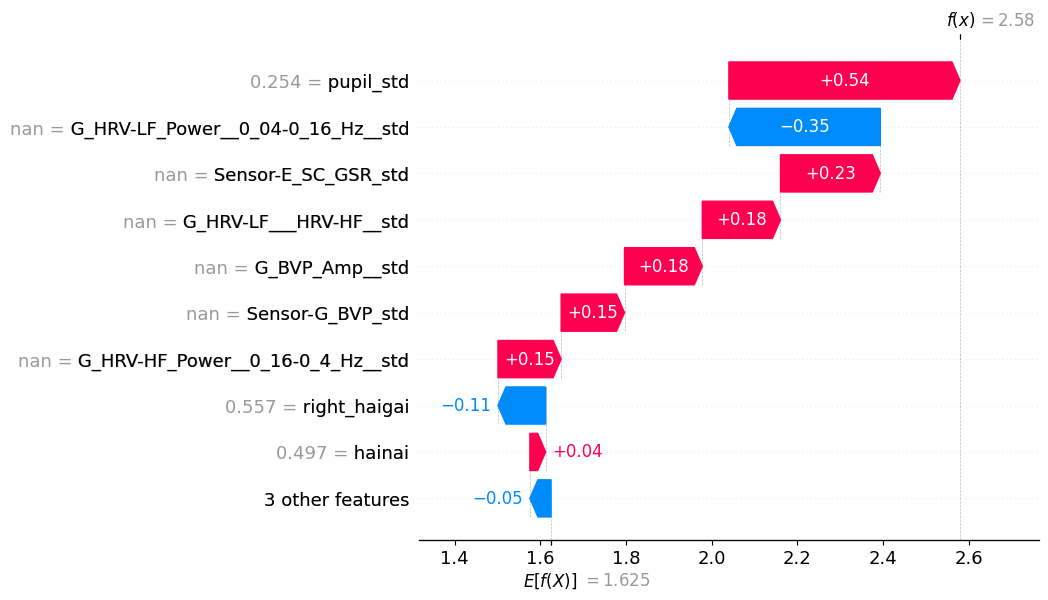

In [35]:
# SHAPの表示
shap.plots.violin(shap_values, features=X, feature_names=X.columns, plot_type="layered_violin")
shap.plots.heatmap(explanation, max_display=12)
shap.plots.beeswarm(explanation, max_display=20)
shap.plots.beeswarm(explanation.abs, color="shap_red")
shap.plots.bar(explanation.abs.mean(0))
shap.plots.bar(explanation)
shap.plots.bar(explanation.cohorts(2).abs.mean(0))
shap.plots.waterfall(explanation[0])
